In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date, datetime

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

# Data Ingestion

In [2]:
df = pd.read_csv("Data/ConsumerElectronics.csv")
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [3]:
# The dataset seesm to have entries with '\N' & whitespaces, so reimporting it
df = pd.read_csv("Data/ConsumerElectronics.csv", na_values=['\\N', ' '])
df.head(5)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,NaN,NaN,COD,5,-1.012991e+18,-7.791756e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,NaN,NaN,COD,7,-8.990325e+18,7.335411e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,NaN,NaN,COD,10,-1.040443e+18,-7.477688e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,NaN,NaN,Prepaid,4,-7.604961e+18,-5.835932e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,NaN,NaN,Prepaid,6,2.894557e+18,5.347354e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [4]:
df.shape

(1648824, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1643920 non-null  float64
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    335852 non-null   float64
 9   deliverycdays                    335853 non-null   float64
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [6]:
# Looking at the count of orders for different subcategories
cols = df.iloc[:, 15:20]

# get value count of orders for each
for col in cols:
    value_counts = cols[col].value_counts()
    percentage = (value_counts/value_counts.sum())*100

    value_counts_df = pd.DataFrame({'Count':value_counts,
                                   'Percentage':percentage})
    print(f"Value counts for {col}:\n")
    print(value_counts_df)
    print("\n" + "-"*50 + "\n")

Value counts for product_analytic_category:

                            Count  Percentage
product_analytic_category                    
EntertainmentSmall         944698   57.295260
CameraAccessory            257493   15.616767
GamingHardware             230958   14.007438
GameCDDVD                  114503    6.944525
Camera                     101172    6.136010

--------------------------------------------------

Value counts for product_analytic_sub_category:

                                Count  Percentage
product_analytic_sub_category                    
Speaker                        543928   32.988845
CameraAccessory                239508   14.525989
GamingAccessory                201899   12.245030
TVVideoSmall                   142995    8.672545
HomeAudio                      124860    7.572670
Game                           114406    6.938642
AudioMP3Player                 112892    6.846819
Camera                         101172    6.136010
GamingConsole                  

In [7]:
# Count of Categories for the 3 sub categories of Interest
sub_cats = ['CameraAccessory', 'GamingAccessory', 'HomeAudio']

counts = df['product_analytic_sub_category'].value_counts()
filtered_counts = counts.loc[sub_cats].sort_values(ascending=False)
percentage = (filtered_counts/value_counts.sum())*100

results_df = pd.DataFrame({'Count':filtered_counts,
                          'Percentage':percentage})
results_df

,Count,Percentage
product_analytic_sub_category,,
CameraAccessory,239508,14.525989
GamingAccessory,201899,12.245030
HomeAudio,124860,7.572670


# Data Duplication Analysis

In [8]:
# checking for entirely duplicated rows
total_duplicates = df.duplicated().sum()
print(f"Total Fully duplicate rows: {total_duplicates}")

Total Fully duplicate rows: 104843


In [9]:
# check for duplicate order_ids
order_id_dupes = df['order_id'].duplicated().sum()
print(f"Total number of duplicate order_ids in the dataset is {order_id_dupes}")

# If order_id duplicates exist, the same order was recorded multiple times.

Total number of duplicate order_ids in the dataset is 147647


In [10]:
# count duplicate occurences of order_id & order_item_id
order_item_dupes = df.duplicated(subset=['order_id', 'order_item_id']).sum()
print(f"Number of duplicate order_id + order_item_id: {order_item_dupes}")

# If order_id + order_item_id is duplicated, it might mean duplicate 
# transactions for the same product.

Number of duplicate order_id + order_item_id: 140114


In [11]:
# Find orders where order_id is repeated, but units are different
dupe_variations = df.groupby(['order_id']).nunique()
dupe_variations = dupe_variations[(dupe_variations['units'] > 1) | (dupe_variations['gmv'] > 1)]

print(f"Number of orders with varying units or GMV: {len(dupe_variations)}")

# If an order_id appears multiple times with different units or gmv, 
# the same order was recorded with modifications.

Number of orders with varying units or GMV: 25443


In [12]:
# Show sample duplicate records
duplicate_rows = df[df.duplicated(subset=['order_id', 'order_item_id'], keep=False)]
print("Sample duplicate records:")
duplicate_rows.head(10)

# This helps us visually inspect why duplicates exist.

Sample duplicate records:


,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,NaN,NaN,Prepaid,4,-7.604961e+18,-5.835932e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
5,ACCCX3S5JGAJETYR,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324.0,1,NaN,NaN,Prepaid,5,-7.641546e+18,-1.919053e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
33,ACCCX3SG2GG9YYAH,2015-10-16 09:47:01,2015,10,4.418241e+15,4.418241e+15,6073.0,1,NaN,NaN,Prepaid,5,6.372566e+18,-9.779010e+17,CE,CameraAccessory,CameraAccessory,Lens,7150,0
41,ACCCX3SG2GG9YYAH,2015-10-28 13:15:38,2015,10,1.428733e+15,1.428733e+15,6749.0,1,NaN,NaN,Prepaid,5,-6.954482e+18,-8.020114e+18,CE,CameraAccessory,CameraAccessory,Lens,7150,0
48,ACCCX3SGAR6NNBMR,2015-10-16 01:51:06,2015,10,4.417942e+15,4.417942e+15,6554.0,1,NaN,NaN,Prepaid,4,6.374130e+18,-3.888685e+18,CE,CameraAccessory,CameraAccessory,Lens,7150,5
50,ACCCX3SGAR6NNBMR,2015-10-16 12:17:31,2015,10,2.418332e+15,2.418332e+15,6133.0,1,NaN,NaN,Prepaid,6,4.478154e+18,3.666648e+18,CE,CameraAccessory,CameraAccessory,Lens,7150,5
51,ACCCX3SGAR6NNBMR,2015-10-17 11:14:10,2015,10,2.419157e+15,2.419157e+15,6695.0,1,NaN,NaN,Prepaid,7,1.861850e+17,-9.779010e+17,CE,CameraAccessory,CameraAccessory,Lens,7150,5
53,ACCCX3SGAR6NNBMR,2015-10-28 20:53:12,2015,10,2.429007e+15,2.429007e+15,6589.0,1,NaN,NaN,Prepaid,6,-2.301456e+18,-6.882949e+17,CE,CameraAccessory,CameraAccessory,Lens,7150,5
56,ACCCX3SGAR6NNBMR,2015-10-16 20:16:58,2015,10,4.418621e+15,4.418621e+15,6695.0,1,NaN,NaN,COD,5,2.530467e+18,-3.069717e+18,CE,CameraAccessory,CameraAccessory,Lens,7150,5
58,ACCCX3SGAR6NNBMR,2015-10-16 06:36:36,2015,10,3.418128e+15,3.418128e+15,6533.0,1,NaN,NaN,COD,5,-7.503869e+18,3.240840e+16,CE,CameraAccessory,CameraAccessory,Lens,7150,5


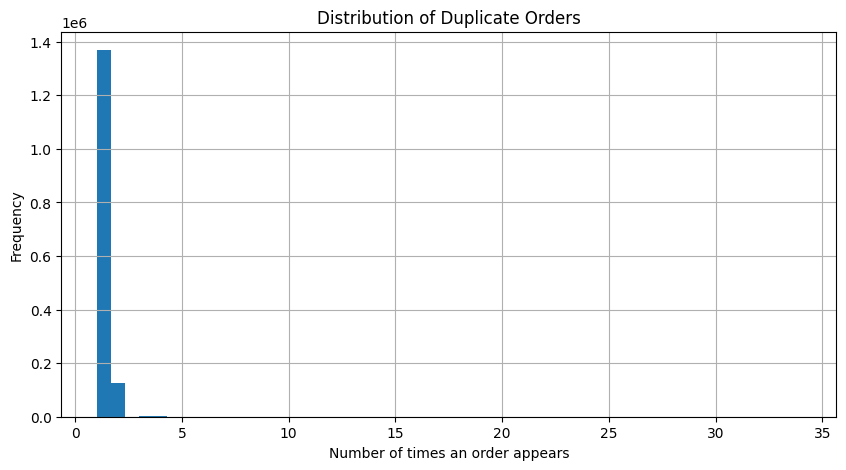

In [13]:
import matplotlib.pyplot as plt

# Count occurrences of each order_id
order_counts = df['order_id'].value_counts()

# Plot histogram of order frequencies
plt.figure(figsize=(10,5))
order_counts.hist(bins=50)
plt.xlabel("Number of times an order appears")
plt.ylabel("Frequency")
plt.title("Distribution of Duplicate Orders")
plt.show()

# Data Cleaning

In [14]:
# dropping the fully duplicated rows
df = df.drop_duplicates()

In [15]:
df.shape

(1543981, 20)

In [16]:
# Remove Duplicate Orders Based on Business-Defined Columns
df = df.drop_duplicates(subset=["order_date", "order_id", "order_item_id", "units"], keep="first", inplace=False)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1536296 entries, 0 to 1543996
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1536296 non-null  object 
 1   order_date                       1536296 non-null  object 
 2   Year                             1536296 non-null  int64  
 3   Month                            1536296 non-null  int64  
 4   order_id                         1536296 non-null  float64
 5   order_item_id                    1536296 non-null  float64
 6   gmv                              1532278 non-null  float64
 7   units                            1536296 non-null  int64  
 8   deliverybdays                    333933 non-null   float64
 9   deliverycdays                    333934 non-null   float64
 10  s1_fact.order_payment_type       1536296 non-null  object 
 11  sla                              1536296 non-null  int6

In [18]:
# removing scientific notifications from order NumericIDs
cols = ['cust_id', 'order_id', 'order_item_id', 'pincode']
df[cols] = df[cols].astype(str)

In [19]:
# converting order_date to DateTime
df['order_date'] = pd.to_datetime(df['order_date'])

In [20]:
# extract order date from Order DateTime
df['order_date'] = df['order_date'].dt.normalize()

In [21]:
# Filter Data within the Business Defined Date Range
start_date = pd.to_datetime("2015-07-01")
end_date = pd.to_datetime("2016-06-30")
df = df[(df['order_date'] >= start_date) & (df['order_date'] <= end_date)]

In [22]:
# Create the order Week Column
df['order_week'] = df['order_date'].dt.isocalendar().week

In [23]:
# Calculate % of Unique Orders
unique_order_percentage = df['order_id'].nunique() / len(df) * 100
print(f"Percentage of unique orders: {unique_order_percentage:.2f}%")

Percentage of unique orders: 97.71%


In [24]:
df.head(6)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_week
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,3419300926147000.0,3419300926147000.0,6400.0,1,NaN,NaN,...,5,-1.01299130778588e+18,-7.79175582905735e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,1420830839915200.0,1420830839915200.0,6900.0,1,NaN,NaN,...,7,-8.99032457905512e+18,7.33541149097431e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800.0,2421912925714800.0,1990.0,1,NaN,NaN,...,10,-1.0404429420466e+18,-7.47768776228657e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400.0,4416592101738400.0,1690.0,1,NaN,NaN,...,4,-7.60496084352714e+18,-5.83593163877661e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400.0,4419525153426400.0,1618.0,1,NaN,NaN,...,6,2.8945572083453e+18,5.34735360997242e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42
5,ACCCX3S5JGAJETYR,2015-10-17,2015,10,3419188825145600.0,3419188825145600.0,3324.0,1,NaN,NaN,...,5,-7.64154636189174e+18,-1.91905269756031e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,42


In [25]:
df.shape

(1535689, 21)

# Null Value Analysis and Treatment

In [26]:
# !pip install missingno

In [27]:
null_counts = df.isnull().sum()
null_percentage = round(100 * (null_counts / len(df)), 2)


if null_counts.empty or null_percentage.empty:
    print("Error: No missing values detected in the dataset.")
else:
    null_df = pd.DataFrame({
        'Missing Count': null_counts,
        'Missing Percentage': null_percentage
    })
    
    null_df = null_df[null_df['Missing Count'] > 0]
    null_df = null_df.sort_values(by="Missing Percentage", ascending=False)
    print(null_df)

                           Missing Count  Missing Percentage
deliverybdays                    1202262               78.29
deliverycdays                    1202261               78.29
product_analytic_vertical           5794                0.38
gmv                                 4018                0.26


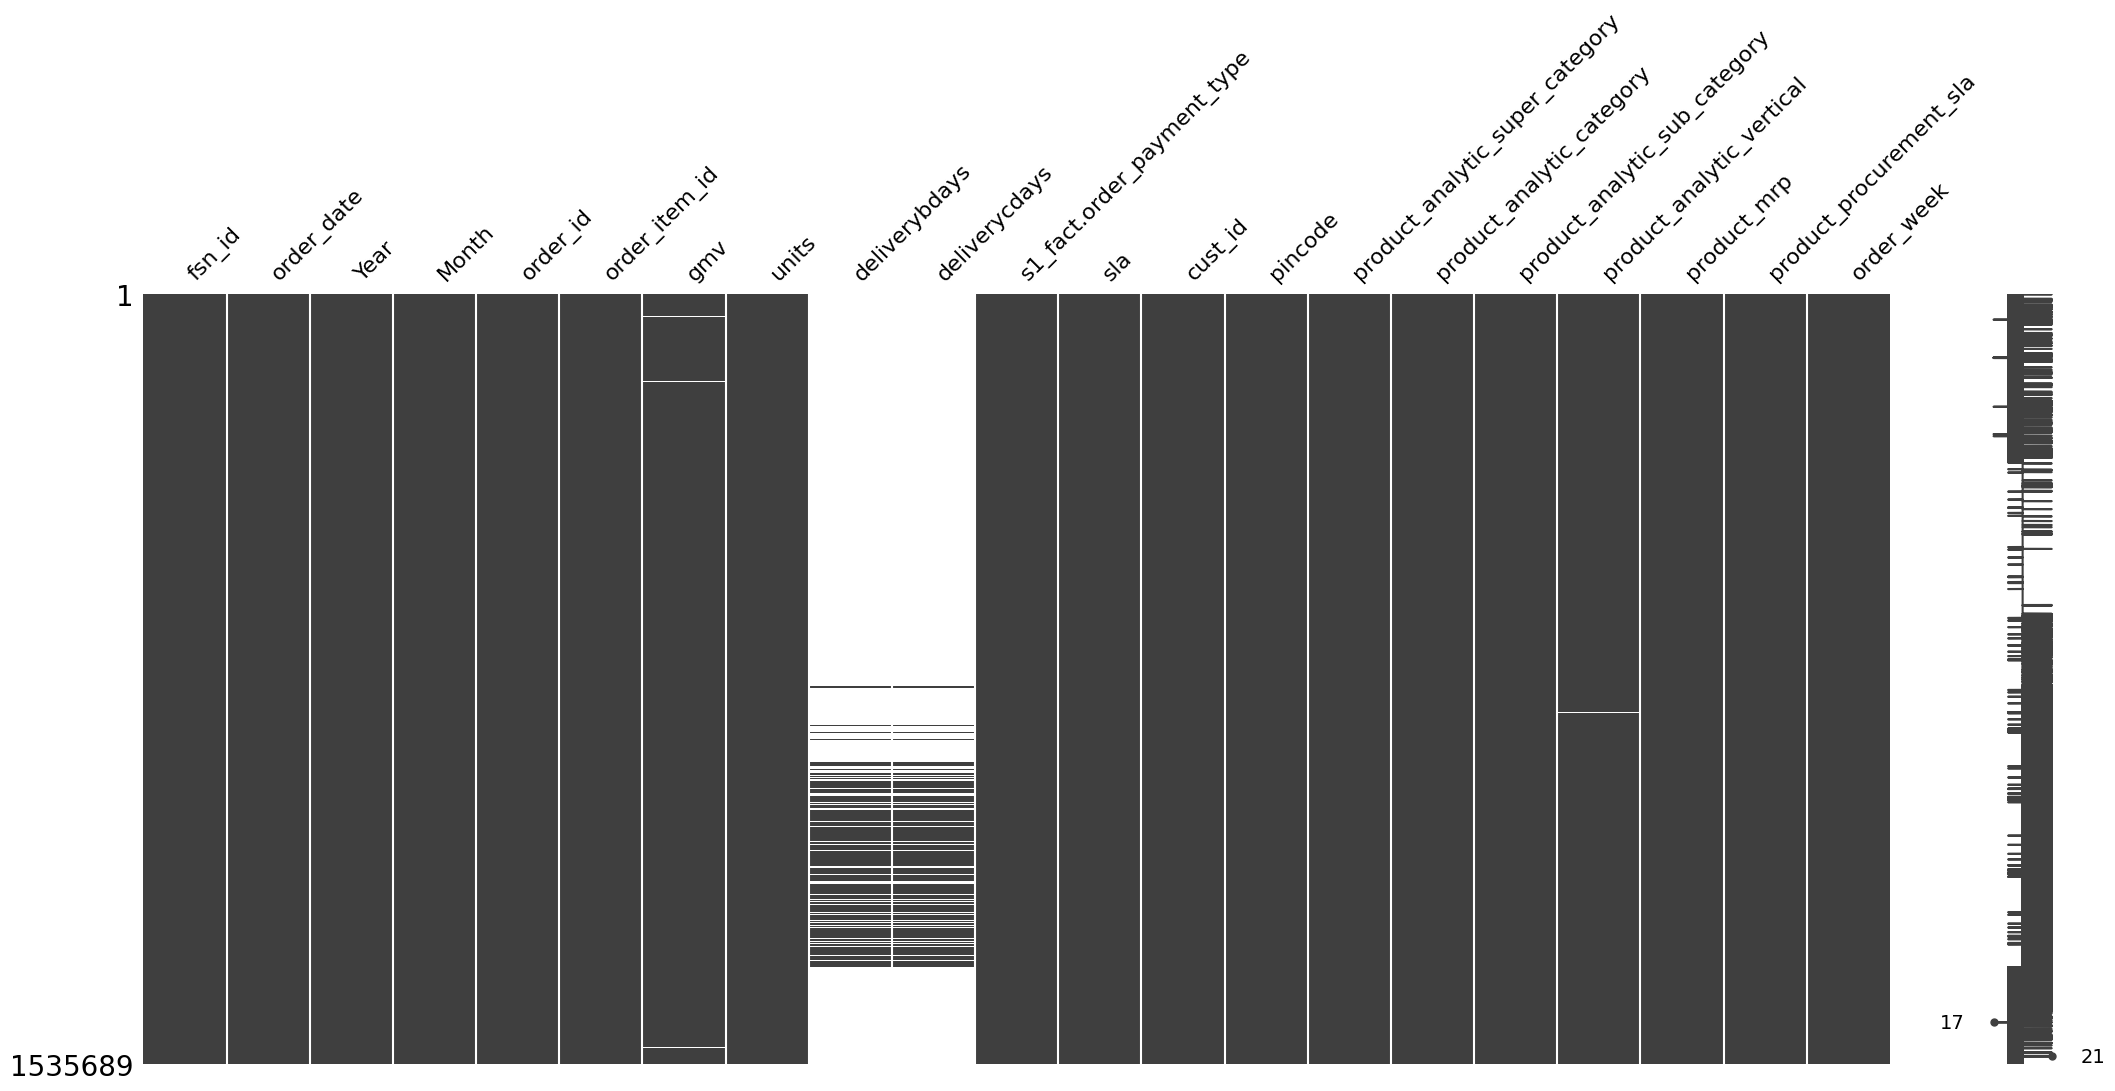

In [28]:
#  Matrix Plot (Alternative View of Missingness)
import missingno as msno
msno.matrix(df)
plt.show()

In [29]:
#  Drop `deliverybdays` & `deliverycdays` as lots of missing values
if "deliverybdays" in df.columns and "deliverycdays" in df.columns:
    if null_percentage["deliverybdays"] > 75 and null_percentage["deliverycdays"] > 75:
        df.drop(['deliverybdays', 'deliverycdays'], axis=1, inplace=True)
        print("Dropped `deliverybdays` and `deliverycdays` due to high missing values.")

Dropped `deliverybdays` and `deliverycdays` due to high missing values.


In [30]:
#  Drop rows where `product_analytic_vertical` & `gmv` are null (if very few missing)
df.dropna(subset=['product_analytic_vertical', 'gmv'], inplace=True)
print("Dropped rows where `product_analytic_vertical` or `gmv` were null.")

Dropped rows where `product_analytic_vertical` or `gmv` were null.


In [31]:
# Adjust `order_week` to Ensure Continuity
def ordWeek(order_week, year):
    return order_week + 53 if (year == 2016 and order_week <= 26) else order_week

In [32]:
# Remove transactions where `product_mrp` = 0 (invalid pricing)
if 'product_mrp' in df.columns:
    df = df[df['product_mrp'] != 0]
    print("Removed transactions with `product_mrp` = 0.")

Removed transactions with `product_mrp` = 0.


In [33]:
# Remove transactions where `gmv` = 0 (invalid revenue)
if 'gmv' in df.columns:
    df = df[df['gmv'] != 0]
    print("Removed transactions with `gmv` = 0.")

Removed transactions with `gmv` = 0.


In [34]:
# Remove records where `gmv` exceeds possible max revenue (`product_mrp * units`)
if {'gmv', 'product_mrp', 'units'}.issubset(df.columns):
    df = df[df['gmv'] <= (df['product_mrp'] * df['units'])]
    print("Removed transactions where `gmv` exceeded `product_mrp * units`.")

Removed transactions where `gmv` exceeded `product_mrp * units`.


In [35]:
# Verify Final Null Value Counts
print("Remaining Null Values After Treatment:\n", df.isnull().sum())

Remaining Null Values After Treatment:
 fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
order_week                         0
dtype: int64


# Outlier Treatment

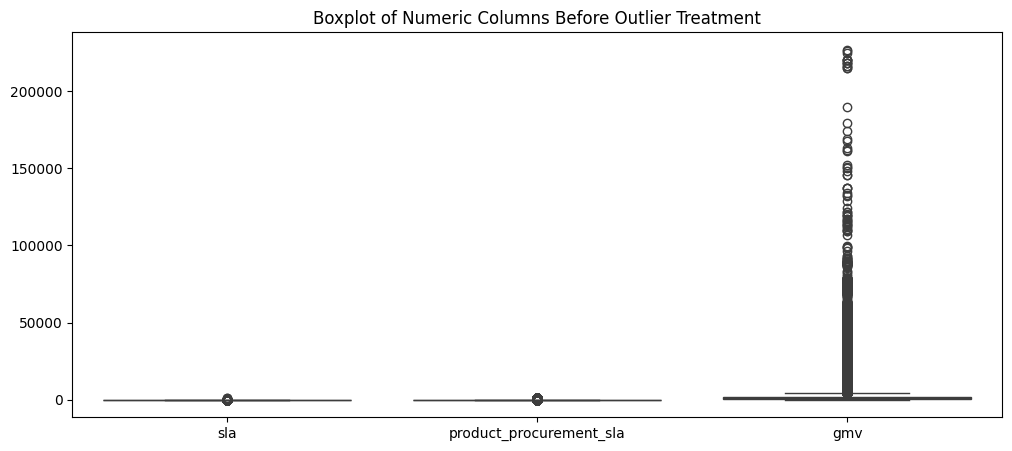

In [36]:
numeric_cols = ['sla', 'product_procurement_sla', 'gmv']

# Boxplot before outlier Treatment
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Columns Before Outlier Treatment")
plt.show()

In [37]:
# Remove SLA Outliers
df = df[df['sla'] <= 30]
print(f"Removed SLA outliers >30 days. Remaining Records: {df.shape[0]}")

Removed SLA outliers >30 days. Remaining Records: 1489932


In [38]:
 # Remove Negative Product Procurement SLA
df = df[df['product_procurement_sla'] >= 0]
print(f"Removed negative procurement SLA values. Remaining records: {df.shape[0]}")

Removed negative procurement SLA values. Remaining records: 1426505


In [39]:
# Remove High Product Procurement SLA (`>15 days`)
df = df[df['product_procurement_sla'] <= 15]
print(f"Removed product procurement SLA >15 days. Remaining records: {df.shape[0]}")

Removed product procurement SLA >15 days. Remaining records: 1422440


In [40]:
# Keep Only Three Relevant Sub-Categories
valid_subcategories = ['GamingAccessory', 'CameraAccessory', 'HomeAudio']
df = df[df['product_analytic_sub_category'].isin(valid_subcategories)]
print(f"Filtered dataset for 3 subcategories. Remaining records: {df.shape[0]}")

Filtered dataset for 3 subcategories. Remaining records: 497561


In [41]:
# Remove GMV Outliers Separately for Each Category (Above 95th Percentile)
cam_q95 = df[df['product_analytic_sub_category'] == 'CameraAccessory']['gmv'].quantile(0.95)
gam_q95 = df[df['product_analytic_sub_category'] == 'GamingAccessory']['gmv'].quantile(0.95)
hom_q95 = df[df['product_analytic_sub_category'] == 'HomeAudio']['gmv'].quantile(0.95)

df = df[
    ~(
        ((df['product_analytic_sub_category'] == 'CameraAccessory') & (df['gmv'] > cam_q95)) |
        ((df['product_analytic_sub_category'] == 'GamingAccessory') & (df['gmv'] > gam_q95)) |
        ((df['product_analytic_sub_category'] == 'HomeAudio') & (df['gmv'] > hom_q95))
    )
]
print(f"Removed GMV outliers above 95th percentile. Remaining records: {df.shape[0]}")

Removed GMV outliers above 95th percentile. Remaining records: 472706


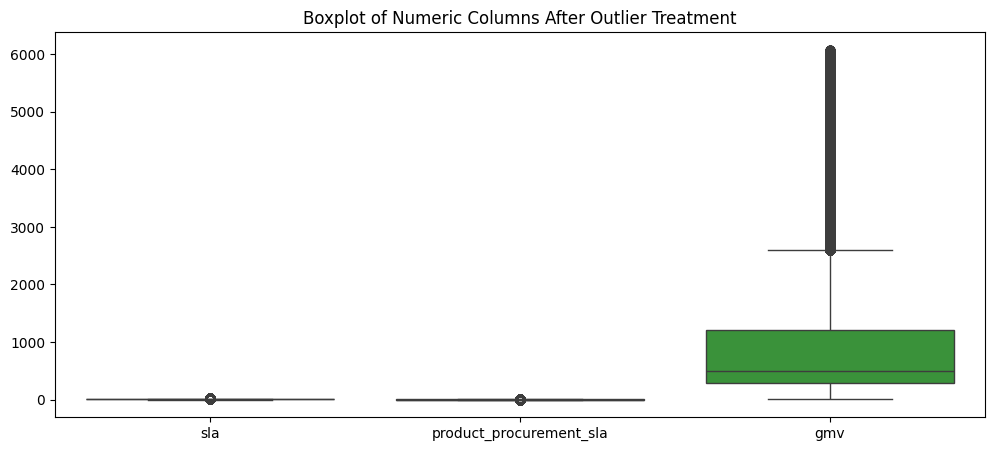

In [42]:
# Boxplot After Outlier Treatment
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Columns After Outlier Treatment")
plt.show()

In [43]:
#  Drop Unused Columns
cols_to_drop = ['fsn_id',
                'order_item_id',
                'pincode',
                'product_analytic_super_category',
                'product_analytic_category']

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print("Dropped unnecessary columns.")

Dropped unnecessary columns.


In [44]:
# Convert Year, Month, and order_week to Integer
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['order_week'] = df['order_week'].astype(int)

In [45]:
df.shape

(472706, 14)

# Exploratory Data Analysis

In [46]:
sns.set_style("whitegrid")

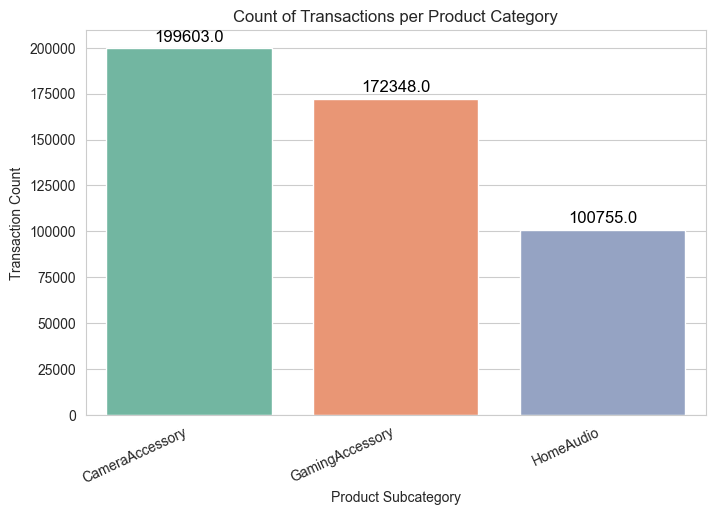

In [47]:
# Count of Transactions Per Category
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df,  x='product_analytic_sub_category', palette="Set2")

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=25, ha="right")
plt.xlabel("Product Subcategory")
plt.ylabel("Transaction Count")
plt.title("Count of Transactions per Product Category")
plt.show()

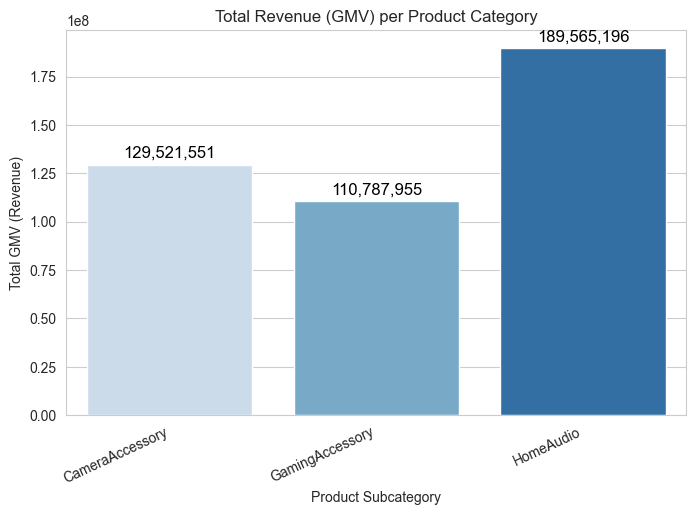

In [48]:
# Visualize Revenue (GMV) per Category ###
total_revenue = df.groupby('product_analytic_sub_category')['gmv'].sum().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(data=total_revenue, x='product_analytic_sub_category', y='gmv', palette="Blues")

# Add value labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=25, ha="right")
plt.xlabel("Product Subcategory")
plt.ylabel("Total GMV (Revenue)")
plt.title("Total Revenue (GMV) per Product Category")
plt.show()


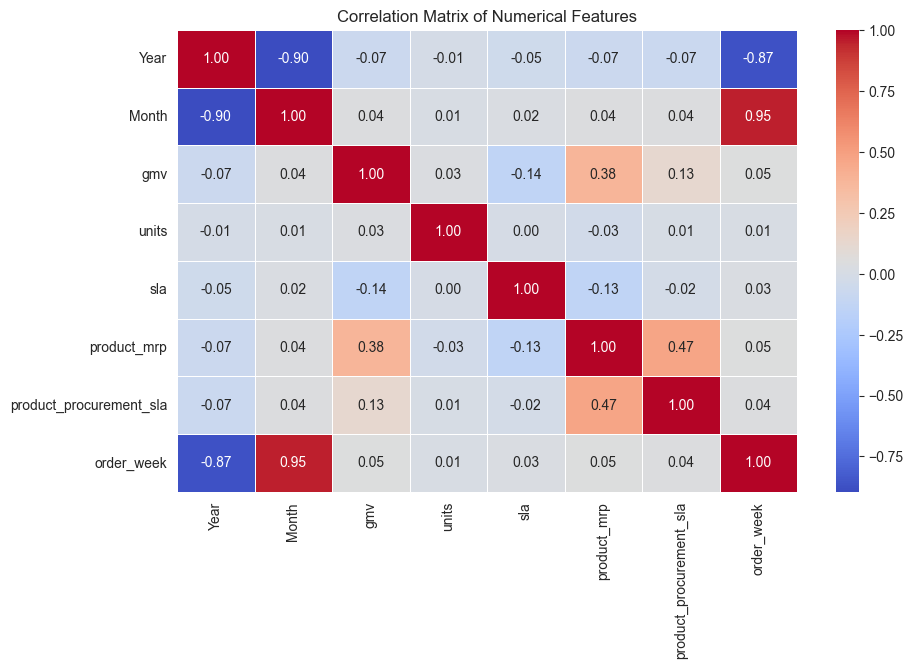

In [49]:
# Correlation Matrix ###
numeric_df = df.select_dtypes(include=['number'])  # Keeps only numeric columns

# Compute Correlation Matrix
plt.figure(figsize=(10,6))
corr_matrix = numeric_df.corr()

# Plot Correlation Heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Matrix of Numerical Features")
plt.show()

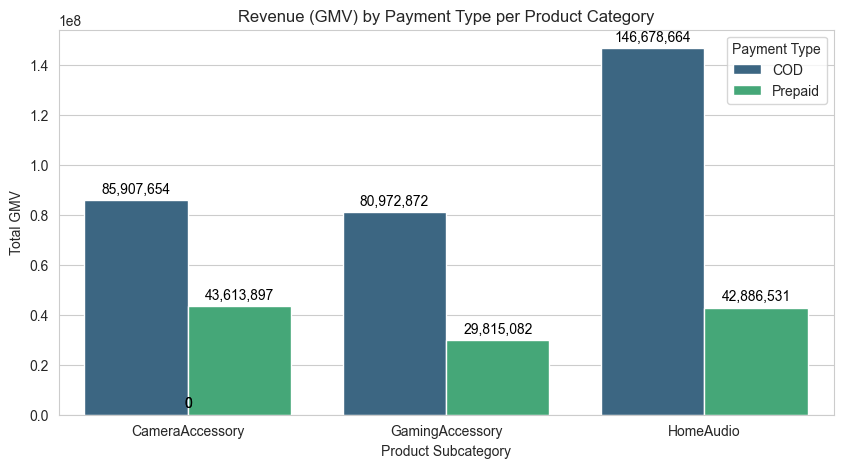

In [50]:
# Revenue (GMV) by Payment Type per Category ###
gmv_by_payment = df.groupby(["s1_fact.order_payment_type",
                             "product_analytic_sub_category"])['gmv'].sum().reset_index()

plt.figure(figsize=(10,5))
ax = sns.barplot(data=gmv_by_payment, x='product_analytic_sub_category',
                 y='gmv', hue="s1_fact.order_payment_type", palette="viridis")

# Add value labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0,5), textcoords='offset points')

plt.xlabel("Product Subcategory")
plt.ylabel("Total GMV")
plt.title("Revenue (GMV) by Payment Type per Product Category")
plt.legend(title="Payment Type")
plt.show()

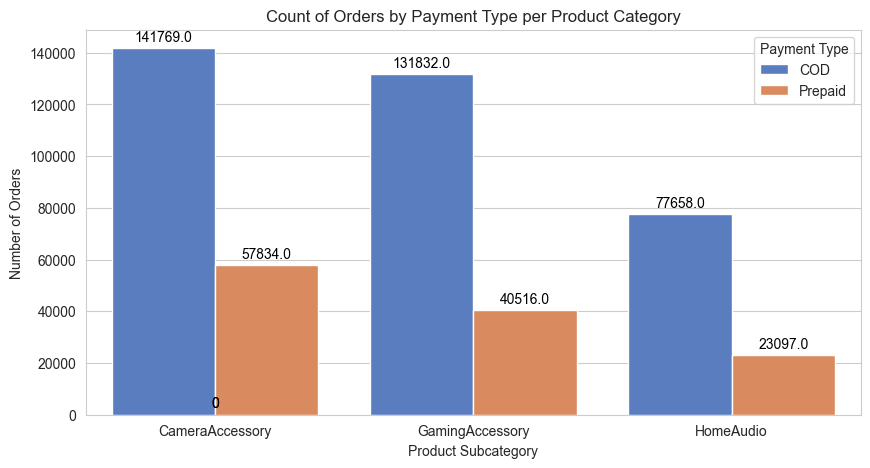

In [51]:
# Count of Orders by Payment Type per Category ###
orders_by_payment = df.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['gmv'].count().reset_index().rename(columns={'gmv':'Count_of_Orders'})

plt.figure(figsize=(10,5))
ax = sns.barplot(data=orders_by_payment, x='product_analytic_sub_category', y='Count_of_Orders', hue="s1_fact.order_payment_type", palette="muted")

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0,5), textcoords='offset points')

plt.xlabel("Product Subcategory")
plt.ylabel("Number of Orders")
plt.title("Count of Orders by Payment Type per Product Category")
plt.legend(title="Payment Type")
plt.show()

In [52]:
# Segmenting Dataset by Product Subcategories ###
gamingAcc = df[df['product_analytic_sub_category'] == 'GamingAccessory'].drop('product_analytic_sub_category', axis=1)
cameraAcc = df[df['product_analytic_sub_category'] == 'CameraAccessory'].drop('product_analytic_sub_category', axis=1)
homeAudio = df[df['product_analytic_sub_category'] == 'HomeAudio'].drop('product_analytic_sub_category', axis=1)

print(f"Gaming Accessories Dataset Shape: {gamingAcc.shape}")
print(f"Camera Accessories Dataset Shape: {cameraAcc.shape}")
print(f"Home Audio Dataset Shape: {homeAudio.shape}")

Gaming Accessories Dataset Shape: (172348, 13)
Camera Accessories Dataset Shape: (199603, 13)
Home Audio Dataset Shape: (100755, 13)


# Feature Engineering 

In [53]:
def dict_to_df(vals_list, col_name):
    df = pd.DataFrame(vals_list)
    df[col_name] = pd.to_datetime(df[col_name]).dt.date  # Convert to date format
    df["total_" + col_name + "s"] = 1
    df['order_week'] = pd.to_datetime(df[col_name]).dt.isocalendar().week  # Updated: Fix deprecated `dt.week`
    df['year'] = pd.to_datetime(df[col_name]).dt.year

    # Fix week continuity issues
    df['order_week'] = df.apply(lambda x: ordWeek(x['order_week'], x['year']), axis=1)

    # ✅ Drop all non-numeric columns before grouping
    df.drop(columns=[col_name, 'year'], inplace=True)

    # Aggregate by week
    df = df.groupby('order_week').sum()

    # Add binary flag for presence of special dates
    df["is_" + col_name] = 1  

    return df

In [54]:
# Weekly Aggregation of Events (Holidays, Special Sales, Pay Days)
def weekly_agg_cols():
    # Holidays
    holidays = {'holiday': ["2016-01-01", "2016-02-16", "2016-02-14", "2016-03-17", "2016-04-03", "2016-04-06",
                            "2016-05-10", "2016-05-18", "2016-06-21", "2016-06-24", "2015-07-01", "2015-08-03",
                            "2015-09-07", "2015-10-12", "2015-10-31", "2015-11-11", "2015-12-25", "2015-12-26"]}
    holiday_df = dict_to_df(holidays, "holiday")

    # Special Sale Days
    special_sale_days = {'special_sale_day': ["2015-07-18", "2015-07-19", "2015-08-15", "2015-08-16",
                                              "2015-08-17", "2015-08-28", "2015-08-29", "2015-08-30",
                                              "2015-10-15", "2015-10-16", "2015-10-17", "2015-11-07",
                                              "2015-11-08", "2015-11-09", "2015-11-10"]}
    special_sale_day_df = dict_to_df(special_sale_days, 'special_sale_day')

    # Pay Days
    pay_days = {'pay_day': ["2015-07-01", "2015-07-15", "2015-08-01", "2015-08-15",
                            "2015-09-01", "2015-09-15", "2015-10-01", "2015-10-15"]}
    pay_days_df = dict_to_df(pay_days, 'pay_day')

    # Combine all weekly KPIs
    final_df = pd.concat([holiday_df, special_sale_day_df, pay_days_df], axis=1)
    
    return final_df.fillna(0).astype(int)

In [55]:
# Function to Create Key Performance Indicators (KPIs)
def define_kpis(df):
    # Payment Mode: COD = 0, Other Methods = 1
    df['payment_mode'] = df['s1_fact.order_payment_type'].apply(lambda x: 0 if x == "COD" else 1)
    
    # Selling Price: GMV per unit, prevent division errors
    df['selling_price'] = np.where(df['units'] > 0, df['gmv'] / df['units'], df['product_mrp'])
    
    # Discount Percentage: Handle division by zero case
    df['discount'] = np.where(df['product_mrp'] > 0, 
                              np.round((df['product_mrp'] - df['selling_price']) / df['product_mrp'], 2), 
                              0)
    
    return df

In [56]:
# Apply Feature Engineering to Subcategory Datasets
gamingAcc = define_kpis(gamingAcc)
cameraAcc = define_kpis(cameraAcc)
homeAudio = define_kpis(homeAudio)

In [57]:
# Aggregating Product Units Sold per Week by Product Vertical
def aggregate_units_sold(df):
    prdVert = df.groupby(['order_week', 'product_analytic_vertical'])['units'].sum().reset_index()
    prdKPI = prdVert.pivot(index='order_week', columns='product_analytic_vertical', values='units').fillna(0)
    prdKPI = prdKPI.apply(pd.to_numeric, errors='coerce')
    df = df.drop(['product_analytic_vertical'], axis=1)
    
    return prdKPI, df

# Apply Aggregation
cam_prdKPI, cameraAcc = aggregate_units_sold(cameraAcc)
gam_prdKPI, gamingAcc = aggregate_units_sold(gamingAcc)
hom_prdKPI, homeAudio = aggregate_units_sold(homeAudio)

In [58]:
# Identify Premium Products (Top 25% GMV)
def mark_premium_products(df):
    q75 = df['gmv'].quantile(0.75)
    df['premium_product'] = df['gmv'].apply(lambda x: 1 if x > q75 else 0)
    return df

cameraAcc = mark_premium_products(cameraAcc)
gamingAcc = mark_premium_products(gamingAcc)
homeAudio = mark_premium_products(homeAudio)


### Importing NPS + Stock Index Data and Merging with the dataset for each category

In [59]:
nps_stock = pd.read_excel("Data/Media data and other information.xlsx",
                          sheet_name="Monthly NPS Score",
                          header=None)

# Transpose and reset index
nps_stock = nps_stock.T.reset_index()

# Drop the first row (it contains column names after transposing)
nps_stock = nps_stock.iloc[1:].reset_index(drop=True)

# Drop the extra 'index' column before renaming
nps_stock.drop(columns=['index'], inplace=True, errors='ignore')

# Rename the remaining columns correctly
nps_stock.columns = ['DT', 'NPS', 'Stock Index']

# Add Year and Month columns for merging
nps_stock['Year'] = [2015] * 6 + [2016] * 6
nps_stock['Month'] = list(range(7, 13)) + list(range(1, 7))

# Drop the DT column (not needed for merging)
nps_stock.drop('DT', axis=1, inplace=True)

# Convert NPS and Stock Index to float
nps_stock['NPS'] = pd.to_numeric(nps_stock['NPS'], errors='coerce')
nps_stock['Stock Index'] = pd.to_numeric(nps_stock['Stock Index'], errors='coerce')

# Print final NPS dataset to verify structure
print(nps_stock.head())

         NPS  Stock Index  Year  Month
0  54.599588         1177  2015      7
1  59.987101         1206  2015      8
2  46.925419         1101  2015      9
3  44.398389         1210  2015     10
4  47.000000         1233  2015     11


In [60]:
# Merge with gaming dataset
gamingAcc = pd.merge(nps_stock, gamingAcc, on=['Month', 'Year'], how='inner')
gamingAcc.head(5)

,NPS,Stock Index,Year,Month,order_date,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_week,payment_mode,selling_price,discount,premium_product
0,54.599588,1177,2015,7,2015-07-10,169460596.0,2800.0,1,Prepaid,9,8.99693154793386e+18,3999,5,28,1,2800.0,0.30,1
1,54.599588,1177,2015,7,2015-07-20,173845985.0,2700.0,1,COD,7,1.09500255673479e+18,3999,5,30,0,2700.0,0.32,1
2,54.599588,1177,2015,7,2015-07-26,176570219.0,2679.0,1,Prepaid,5,-8.90062723244583e+18,3999,5,30,1,2679.0,0.33,1
3,54.599588,1177,2015,7,2015-07-08,168513415.0,2789.0,1,Prepaid,7,6.51506027271842e+18,3999,5,28,1,2789.0,0.30,1
4,54.599588,1177,2015,7,2015-07-17,172787973.0,2884.0,1,COD,6,-7.66116860255889e+18,3999,5,29,0,2884.0,0.28,1


In [61]:
gamingAcc.columns

Index(['NPS', 'Stock Index', 'Year', 'Month', 'order_date', 'order_id', 'gmv',
       'units', 's1_fact.order_payment_type', 'sla', 'cust_id', 'product_mrp',
       'product_procurement_sla', 'order_week', 'payment_mode',
       'selling_price', 'discount', 'premium_product'],
      dtype='object')

In [62]:
# Merge with camera dataset
cameraAcc = pd.merge(nps_stock, cameraAcc, on=['Month', 'Year'], how='inner')
cameraAcc.head(5)

,NPS,Stock Index,Year,Month,order_date,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_week,payment_mode,selling_price,discount,premium_product
0,54.599588,1177,2015,7,2015-07-19,173582320.0,3900.0,1,Prepaid,7,-7.66684108642762e+18,4044,5,29,1,3900.0,0.04,1
1,54.599588,1177,2015,7,2015-07-31,178453273.0,5990.0,1,COD,4,-4.15165050515932e+18,7450,5,31,0,5990.0,0.20,1
2,54.599588,1177,2015,7,2015-07-17,172797721.0,5430.0,1,COD,4,7.13630763257196e+18,7450,5,29,0,5430.0,0.27,1
3,54.599588,1177,2015,7,2015-07-15,171546524.0,6074.0,1,COD,4,9.08002628991787e+18,7450,5,29,0,6074.0,0.18,1
4,54.599588,1177,2015,7,2015-07-11,169881025.0,5899.0,1,COD,7,2.62584016531973e+18,7450,5,28,0,5899.0,0.21,1


In [63]:
# Merge with home audio dataset
homeAudio = pd.merge(nps_stock, homeAudio, on=['Month', 'Year'], how='inner')
homeAudio.head(5)

,NPS,Stock Index,Year,Month,order_date,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_week,payment_mode,selling_price,discount,premium_product
0,54.599588,1177,2015,7,2015-07-17,172507066.0,2850.0,1,COD,9,-2.98994669715843e+18,4175,1,29,0,2850.0,0.32,1
1,54.599588,1177,2015,7,2015-07-17,172480103.0,2850.0,1,COD,11,8.16154863104155e+18,4175,1,29,0,2850.0,0.32,1
2,54.599588,1177,2015,7,2015-07-14,171342414.0,3750.0,1,COD,10,-8.21827516402817e+18,4599,0,29,0,3750.0,0.18,1
3,54.599588,1177,2015,7,2015-07-14,171191091.0,3750.0,1,COD,12,3.99973105974888e+18,4599,0,29,0,3750.0,0.18,1
4,54.599588,1177,2015,7,2015-07-16,172280022.0,3750.0,1,COD,8,7.31560125192162e+18,4599,0,29,0,3750.0,0.18,1


### Weekly Aggregation of Datasets

In [64]:
print("Available Columns in gamingAcc:", gamingAcc.columns.tolist())

# Check if all required columns exist
required_columns = [
    'gmv', 'units', 'order_week', 'sla', 'product_procurement_sla', 
    'product_mrp', 'selling_price', 'NPS', 'Stock Index', 'discount', 
    'order_id', 'premium_product'
]

# Check missing columns
missing_cols = [col for col in required_columns if col not in gamingAcc.columns]
if missing_cols:
    print("Missing Columns:", missing_cols)
else:
    print("✅ All required columns exist!")

Available Columns in gamingAcc: ['NPS', 'Stock Index', 'Year', 'Month', 'order_date', 'order_id', 'gmv', 'units', 's1_fact.order_payment_type', 'sla', 'cust_id', 'product_mrp', 'product_procurement_sla', 'order_week', 'payment_mode', 'selling_price', 'discount', 'premium_product']
✅ All required columns exist!


In [67]:
# Aggregating camera dataset
gamingAcc_sum = gamingAcc[['gmv', 'units', 'order_week']].groupby('order_week').sum()
gamingAcc_mean = gamingAcc[['sla', 'product_procurement_sla', 'order_week',
                            'product_mrp', 'selling_price', 'NPS',
                            'Stock Index', 'discount']].groupby('order_week').mean()
gamingAcc_count = gamingAcc[['order_id', 'order_week', 'premium_product']].groupby('order_week').count().rename(columns={'order_id': 'total_transactions', 'premium_product': 'total_premium_products'})

# Merge aggregated data
gamingAcc_final = pd.concat([gamingAcc_sum, gamingAcc_mean, gamingAcc_count], axis=1).reset_index()

In [68]:
# Aggregating camera dataset
cameraAcc_sum = cameraAcc[['gmv', 'units', 'order_week']].groupby('order_week').sum()
cameraAcc_mean = cameraAcc[['sla', 'product_procurement_sla', 'order_week',
                            'product_mrp', 'selling_price', 'NPS',
                            'Stock Index', 'discount']].groupby('order_week').mean()
cameraAcc_count = cameraAcc[['order_id', 'order_week', 'premium_product']].groupby('order_week').count().rename(columns={'order_id': 'total_transactions', 'premium_product': 'total_premium_products'})

# Merge aggregated data
cameraAcc_final = pd.concat([cameraAcc_sum, cameraAcc_mean, cameraAcc_count], axis=1).reset_index()


In [69]:
# Aggregating home audio dataset
homeAudio_sum = homeAudio[['gmv', 'units', 'order_week']].groupby('order_week').sum()
homeAudio_mean = homeAudio[['sla', 'product_procurement_sla', 'product_mrp', 'selling_price', 'order_week',
                            'Stock Index', 'discount']].groupby('order_week').mean()
homeAudio_count = homeAudio[['order_id', 'order_week', 'premium_product']].groupby('order_week').count().rename(columns={'order_id': 'total_transactions', 'premium_product': 'total_premium_products'})

# Merge aggregated data
homeAudio_final = pd.concat([homeAudio_sum, homeAudio_mean, homeAudio_count], axis=1).reset_index()


In [70]:
gamingAcc_final.columns

Index(['order_week', 'gmv', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'NPS', 'Stock Index', 'discount',
       'total_transactions', 'total_premium_products'],
      dtype='object')

In [71]:
# Merge with weekly aggregate columns
gamingAcc_final = pd.merge(gamingAcc_final, weekly_agg_cols().reset_index(), on='order_week', how='left').fillna(0)
cameraAcc_final = pd.merge(cameraAcc_final, weekly_agg_cols().reset_index(), on='order_week', how='left').fillna(0)
homeAudio_final = pd.merge(homeAudio_final, weekly_agg_cols().reset_index(), on='order_week', how='left').fillna(0)

In [72]:
gamingAcc_final = pd.merge(gamingAcc_final, gam_prdKPI, on='order_week', how='left')
cameraAcc_final = pd.merge(cameraAcc_final, cam_prdKPI, on='order_week', how='left')
homeAudio_final = pd.merge(homeAudio_final, hom_prdKPI, on='order_week', how='left')


In [73]:
print("Gaming Accessories Final Dataset Shape:", gamingAcc_final.shape)
print("Camera Accessories Final Dataset Shape:", cameraAcc_final.shape)
print("Home Audio Final Dataset Shape:", homeAudio_final.shape)

print("Data Integration Completed Successfully!")


Gaming Accessories Final Dataset Shape: (53, 33)
Camera Accessories Final Dataset Shape: (52, 40)
Home Audio Final Dataset Shape: (50, 27)
Data Integration Completed Successfully!


### Importing Media Investment Data & Merging it with the Dataset for each Product Category

In [74]:
#  Load media investment data
media_investment = pd.read_excel("Data/Media data and other information.xlsx", 
                                 sheet_name="Media Investment", header=2)

In [75]:
# Clean the data by selecting only relevant rows & columns
media_investment = media_investment.iloc[:12, 1:13].reset_index(drop=True)

In [76]:
# Convert Year & Month to integer type
media_investment["Year"] = media_investment["Year"].astype(int)
media_investment["Month"] = media_investment["Month"].astype(int)

# Fill missing values with 0 (assuming no investment in those months)
media_investment = media_investment.fillna(0)

In [77]:
# Create mapping for number of weeks per month
weeks_df = pd.DataFrame({
    "Month": list(range(1, 13)), 
    "number_of_weeks": [4, 4, 5, 4, 4, 5, 4, 4, 5, 4, 4, 5]
})

# Merge weeks mapping with media investment
media_investment = media_investment.merge(weeks_df, on="Month", how="inner")

In [78]:
# Merge weeks mapping with media investment
media_investment = media_investment.merge(weeks_df, on="Month", how="inner")

In [80]:
media_investment.columns

Index(['Year', 'Month', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'number_of_weeks_x', 'number_of_weeks_y'],
      dtype='object')

In [82]:
# Convert monthly investments into weekly investments using vectorized division
investment_cols = ["TV", "Digital", "Sponsorship", "Content Marketing", "Online marketing", 
                   " Affiliates", "SEM", "Radio", "Other"]
media_investment[investment_cols] = media_investment[investment_cols].div(media_investment["number_of_weeks_y"], axis=0)

In [84]:
# Load order_week mapping from original dataset
order_week = df[["order_week", "Month", "Year"]].drop_duplicates().reset_index(drop=True)

In [86]:
# Merge media investment with order_week mapping
media_investment_weekly = order_week.merge(media_investment.drop(columns=["number_of_weeks_y"]), on=["Month", "Year"], how="inner")

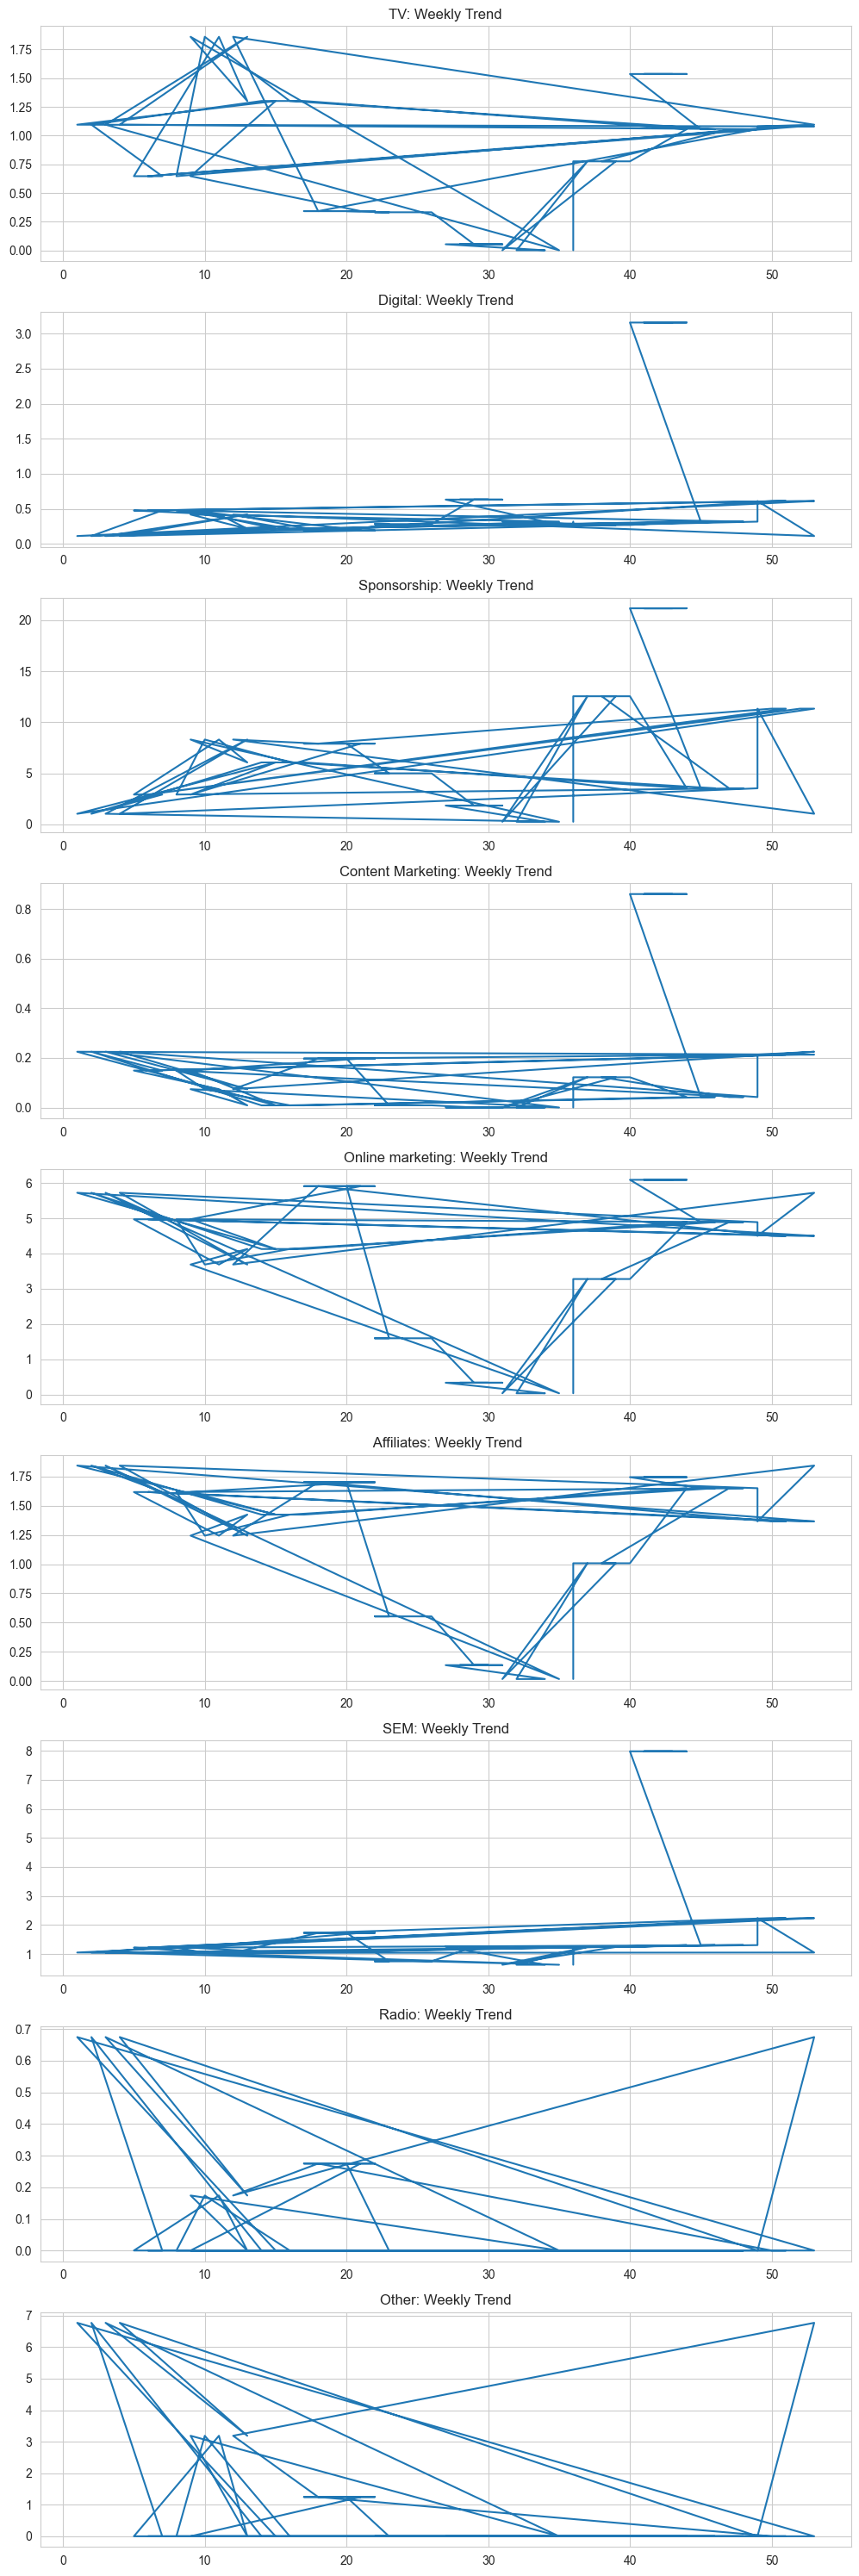

In [87]:
# Plot weekly trends of media investments
plt.figure(figsize=(10, 30))
for i, col in enumerate(investment_cols, start=1):
    plt.subplot(len(investment_cols), 1, i)
    plt.plot(media_investment_weekly["order_week"], media_investment_weekly[col])
    plt.title(f"{col}: Weekly Trend")
plt.tight_layout()
plt.show()

In [88]:
# **Define Adstock Calculation Function**
# --------------------------------------------------------------

def compute_adstock(df, col_name, adstock_rate=0.5):
    """
    Compute Adstock values for a given media investment column.
    """
    adstock_values = np.zeros(len(df))
    for i in range(len(df)):
        adstock_values[i] = df.at[i, col_name] + (adstock_rate * adstock_values[i-1] if i > 0 else 0)
    
    return pd.DataFrame({f"adStock_{col_name}": adstock_values}, index=df.index)

In [89]:
# --------------------------------------------------------------
# **Compute Adstocks for All Media Channels**
# --------------------------------------------------------------

adstock_data = pd.concat([
    compute_adstock(media_investment_weekly, col) for col in investment_cols
], axis=1)

# Concatenate adstock data with weekly investment data
adstock_final_data = pd.concat([media_investment_weekly, adstock_data], axis=1)

# Drop original investment columns after computing Adstock
adstock_final_data.drop(columns=investment_cols, inplace=True)

In [90]:
# **Merge Adstock Data with Product Categories**
# --------------------------------------------------------------

cameraAcc_final = cameraAcc_final.merge(adstock_final_data, on="order_week", how="right")
gamingAcc_final = gamingAcc_final.merge(adstock_final_data, on="order_week", how="right")
homeAudio_final = homeAudio_final.merge(adstock_final_data, on="order_week", how="right")

In [91]:
# --------------------------------------------------------------
# **Final Data Validation & Shape Check**
# --------------------------------------------------------------

print("✅ Final dataset shapes:")
print("Camera Accessory:", cameraAcc_final.shape)
print("Gaming Accessory:", gamingAcc_final.shape)
print("Home Audio:", homeAudio_final.shape)


✅ Final dataset shapes:
Camera Accessory: (63, 53)
Gaming Accessory: (63, 46)
Home Audio: (63, 40)


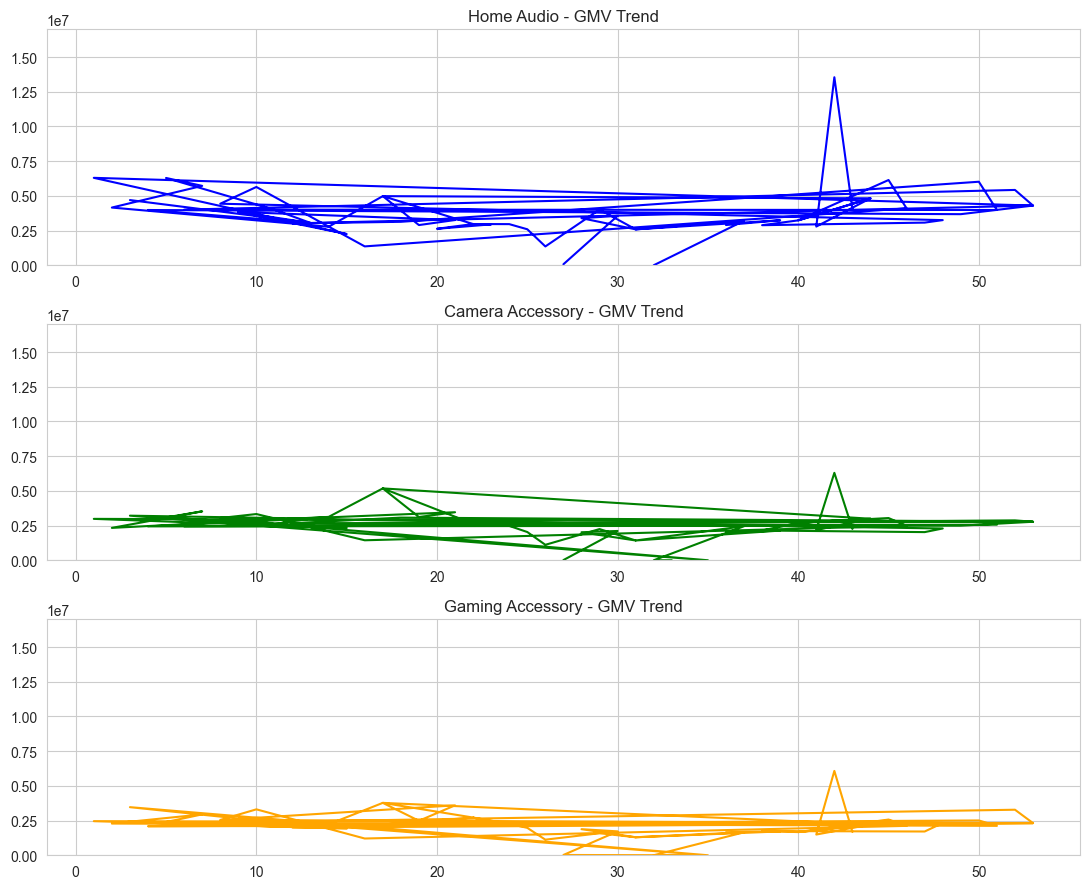

In [92]:
# **Plot Weekly GMV Trends for Each Category**
# --------------------------------------------------------------

plt.figure(figsize=(11, 9))

plt.subplot(3, 1, 1)
plt.plot(homeAudio_final["order_week"], homeAudio_final["gmv"], color="blue")
plt.title("Home Audio - GMV Trend")
plt.ylim(0, 17000000)

plt.subplot(3, 1, 2)
plt.plot(cameraAcc_final["order_week"], cameraAcc_final["gmv"], color="green")
plt.title("Camera Accessory - GMV Trend")
plt.ylim(0, 17000000)

plt.subplot(3, 1, 3)
plt.plot(gamingAcc_final["order_week"], gamingAcc_final["gmv"], color="orange")
plt.title("Gaming Accessory - GMV Trend")
plt.ylim(0, 17000000)

plt.tight_layout()
plt.show()

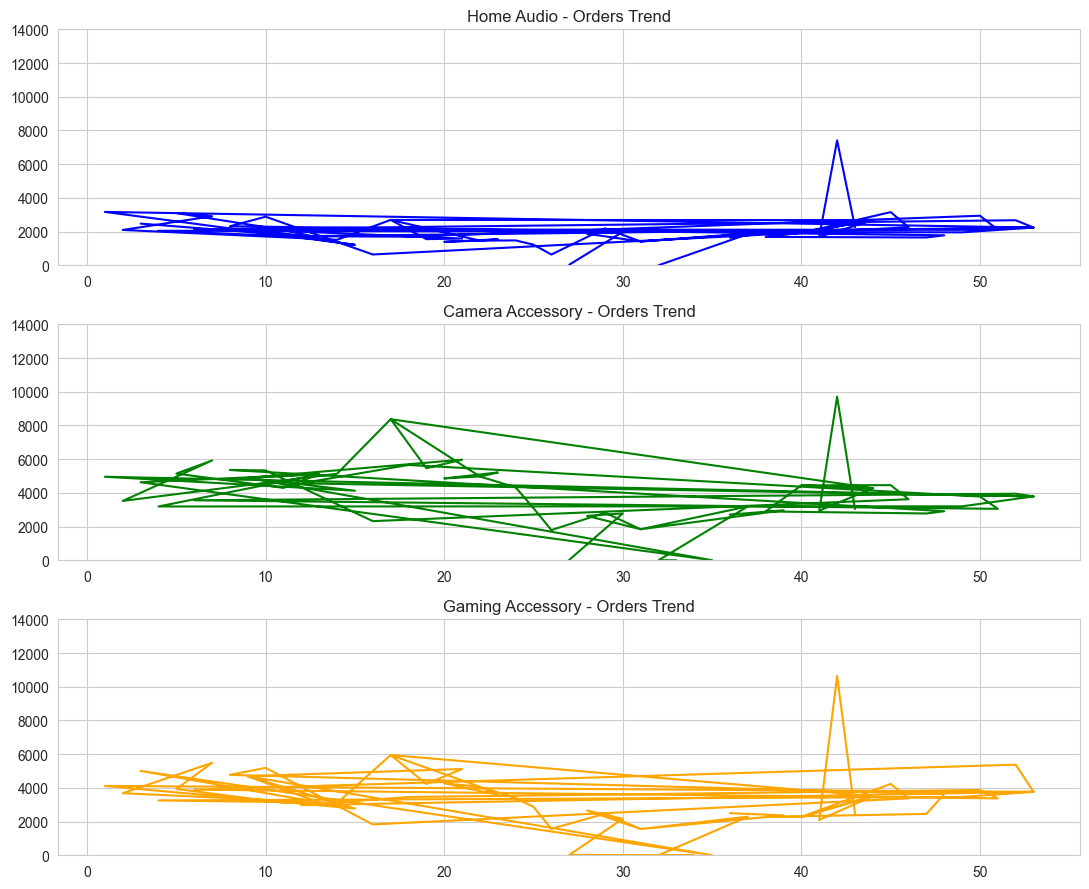

In [93]:
# **Plot Number of Orders Trend for Each Category**
# --------------------------------------------------------------

plt.figure(figsize=(11, 9))

plt.subplot(3, 1, 1)
plt.plot(homeAudio_final["order_week"], homeAudio_final["total_transactions"], color="blue")
plt.title("Home Audio - Orders Trend")
plt.ylim(0, 14000)

plt.subplot(3, 1, 2)
plt.plot(cameraAcc_final["order_week"], cameraAcc_final["total_transactions"], color="green")
plt.title("Camera Accessory - Orders Trend")
plt.ylim(0, 14000)

plt.subplot(3, 1, 3)
plt.plot(gamingAcc_final["order_week"], gamingAcc_final["total_transactions"], color="orange")
plt.title("Gaming Accessory - Orders Trend")
plt.ylim(0, 14000)

plt.tight_layout()
plt.show()